# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib 
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)
sns.set(style = 'whitegrid')
sns.set_palette('deep')

# Loading Data

In [2]:
data = pd.read_csv('movies.csv')


# Data Exploration

In [3]:
data.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7668 entries, 0 to 7667
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7668 non-null   object 
 1   rating    7591 non-null   object 
 2   genre     7668 non-null   object 
 3   year      7668 non-null   int64  
 4   released  7666 non-null   object 
 5   score     7665 non-null   float64
 6   votes     7665 non-null   float64
 7   director  7668 non-null   object 
 8   writer    7665 non-null   object 
 9   star      7667 non-null   object 
 10  country   7665 non-null   object 
 11  budget    5497 non-null   float64
 12  gross     7479 non-null   float64
 13  company   7651 non-null   object 
 14  runtime   7664 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 898.7+ KB


In [5]:
genres = data["genre"].unique()
genres

array(['Drama', 'Adventure', 'Action', 'Comedy', 'Horror', 'Biography',
       'Crime', 'Fantasy', 'Family', 'Sci-Fi', 'Animation', 'Romance',
       'Music', 'Western', 'Thriller', 'History', 'Mystery', 'Sport',
       'Musical'], dtype=object)

In [6]:
ratings = data["rating"].unique()
ratings

array(['R', 'PG', 'G', nan, 'Not Rated', 'NC-17', 'Approved', 'TV-PG',
       'PG-13', 'Unrated', 'X', 'TV-MA', 'TV-14'], dtype=object)

In [7]:
years = data["year"].unique()
years

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020], dtype=int64)

# Data Cleaning

#### Cheking duplicated data and missing values

In [8]:
data.duplicated().any()

False

<Axes: >

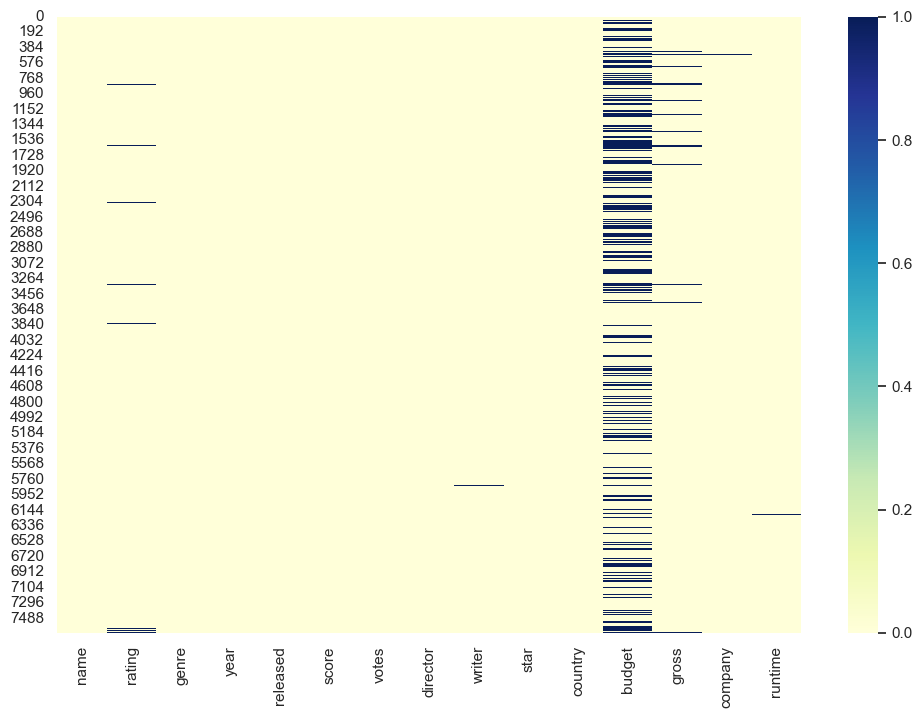

In [9]:
data.isna().any()
sns.heatmap(data.isna(), cmap = 'YlGnBu')

In [10]:
for col in data.columns:
    pct_missing = np.mean(data[col].isna())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


#### Treating NA values: imputation and dropping

In [11]:
data["budget"].fillna(data['budget'].mean(), inplace = True)
data["gross"].fillna(data["gross"].mean(), inplace = True)
clean_data = data.dropna()
for col in clean_data.columns:
    pct_missing = np.mean(clean_data[col].isna())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.0%
genre - 0.0%
year - 0.0%
released - 0.0%
score - 0.0%
votes - 0.0%
director - 0.0%
writer - 0.0%
star - 0.0%
country - 0.0%
budget - 0.0%
gross - 0.0%
company - 0.0%
runtime - 0.0%


In [12]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7574 entries, 0 to 7659
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      7574 non-null   object 
 1   rating    7574 non-null   object 
 2   genre     7574 non-null   object 
 3   year      7574 non-null   int64  
 4   released  7574 non-null   object 
 5   score     7574 non-null   float64
 6   votes     7574 non-null   float64
 7   director  7574 non-null   object 
 8   writer    7574 non-null   object 
 9   star      7574 non-null   object 
 10  country   7574 non-null   object 
 11  budget    7574 non-null   float64
 12  gross     7574 non-null   float64
 13  company   7574 non-null   object 
 14  runtime   7574 non-null   float64
dtypes: float64(5), int64(1), object(9)
memory usage: 946.8+ KB


#### Changing Data Types

In [13]:
clean_data['budget'] = clean_data['budget'].astype('int64')
clean_data['gross'] = clean_data['gross'].astype('int64')
clean_data['runtime'] = clean_data['runtime'].astype('int64')
clean_data['votes'] = clean_data['votes'].astype('int64')
clean_data['score'] = clean_data['score'].astype('float64')


C:\Users\tjbru\AppData\Local\Temp\ipykernel_1668\2108124060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['budget'] = clean_data['budget'].astype('int64')
C:\Users\tjbru\AppData\Local\Temp\ipykernel_1668\2108124060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['gross'] = clean_data['gross'].astype('int64')
C:\Users\tjbru\AppData\Local\Temp\ipykernel_1668\2108124060.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

#### The value of the year column and the year in the date of the column 'released' aren't always equal.  Let's divide released into 2 new columns: 'release_year' and 'release_country'

In [14]:
clean_data['release_country'] = clean_data['released'].str.extract(r'\((.*?)\)', expand = False)
clean_data['release_year'] = pd.to_datetime(clean_data['released'].str.extract(r'(\d{4})', expand = False)).dt.year
clean_data.head(10)

C:\Users\tjbru\AppData\Local\Temp\ipykernel_1668\1351206373.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['release_country'] = clean_data['released'].str.extract(r'\((.*?)\)', expand = False)
C:\Users\tjbru\AppData\Local\Temp\ipykernel_1668\1351206373.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data['release_year'] = pd.to_datetime(clean_data['released'].str.extract(r'(\d{4})', expand = False)).dt.year


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,release_year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,United States,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,United States,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,United States,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,United States,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,United States,1980
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000,39754601,Paramount Pictures,95,United States,1980
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000,John Landis,Dan Aykroyd,John Belushi,United States,27000000,115229890,Universal Pictures,133,United States,1980
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000,23402427,Chartoff-Winkler Productions,129,United States,1980
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000,108185706,Dovemead Films,127,United States,1981
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000,Walter Hill,Bill Bryden,David Carradine,United States,10000000,15795189,United Artists,100,United States,1980


#### Let's order our data by a variable: gross revenue

In [15]:
pd.set_option('display.max_rows', None)

In [16]:
clean_data = clean_data.sort_values(by = ['gross'], inplace = False, ascending = False)
clean_data.head(10)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,release_country,release_year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162,United States,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181,United States,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194,United States,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138,United States,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149,United States,2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000,1670727580,Walt Disney Pictures,118,United States,2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000,1670516444,Universal Pictures,124,United States,2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000,1518815515,Marvel Studios,143,United States,2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000,James Wan,Chris Morgan,Vin Diesel,United States,190000000,1515341399,Universal Pictures,137,United States,2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000,1450026933,Walt Disney Animation Studios,103,United States,2019


# Data Analysis

### Let's look for correlations between numerical variables

Text(117.24999999999999, 0.5, 'Movie Features')

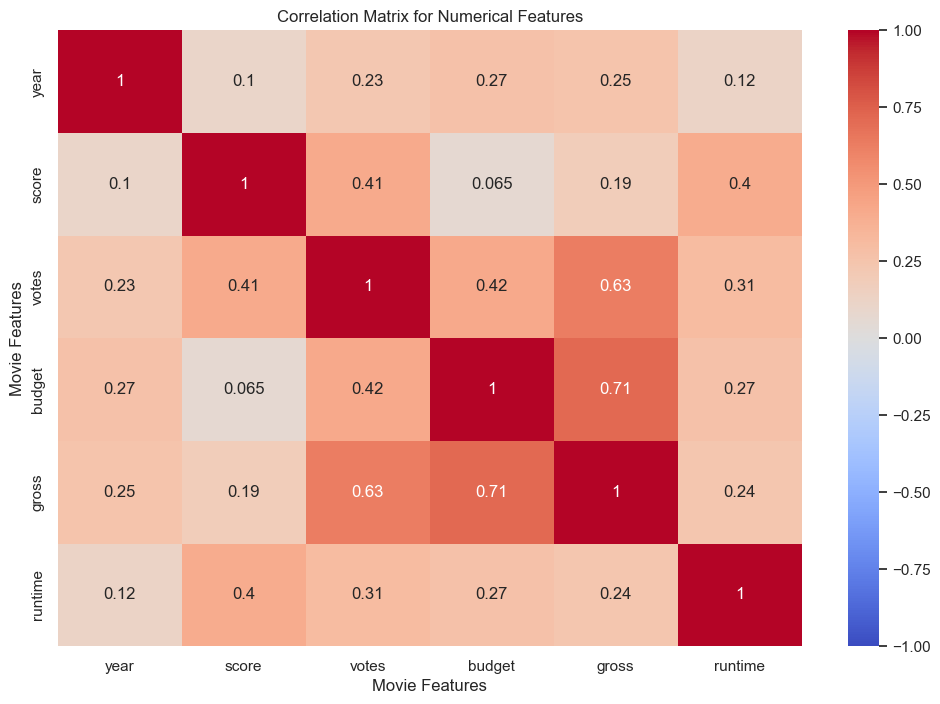

In [17]:
numeric_vars = clean_data.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_vars.corr(method="pearson")
sns.heatmap(corr_matrix, annot = True, cmap='coolwarm', vmin = -1, vmax = 1)
plt.title('Correlation Matrix for Numerical Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')

### Budget vs gross. Given the type of numerical data, we will use Pearson's correlation

#### Let's also visualize this with a scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

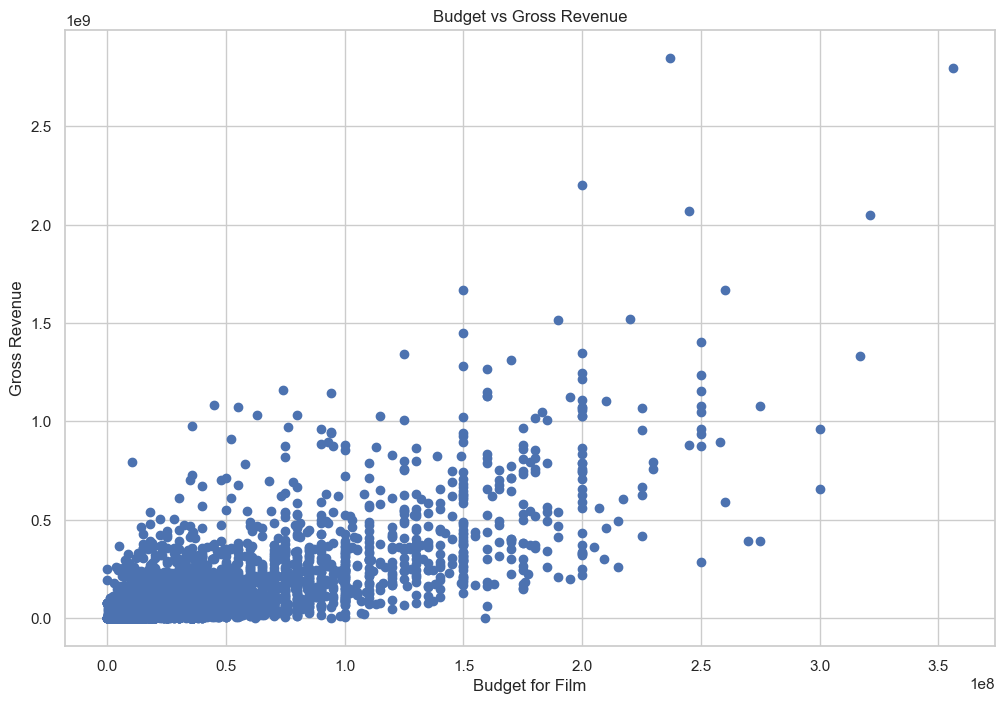

In [18]:
plt.scatter(x = clean_data['budget'], y = clean_data['gross'])
plt.title('Budget vs Gross Revenue')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Revenue')
plt.show

#### Now let's visualize this using seaborn's regression plot

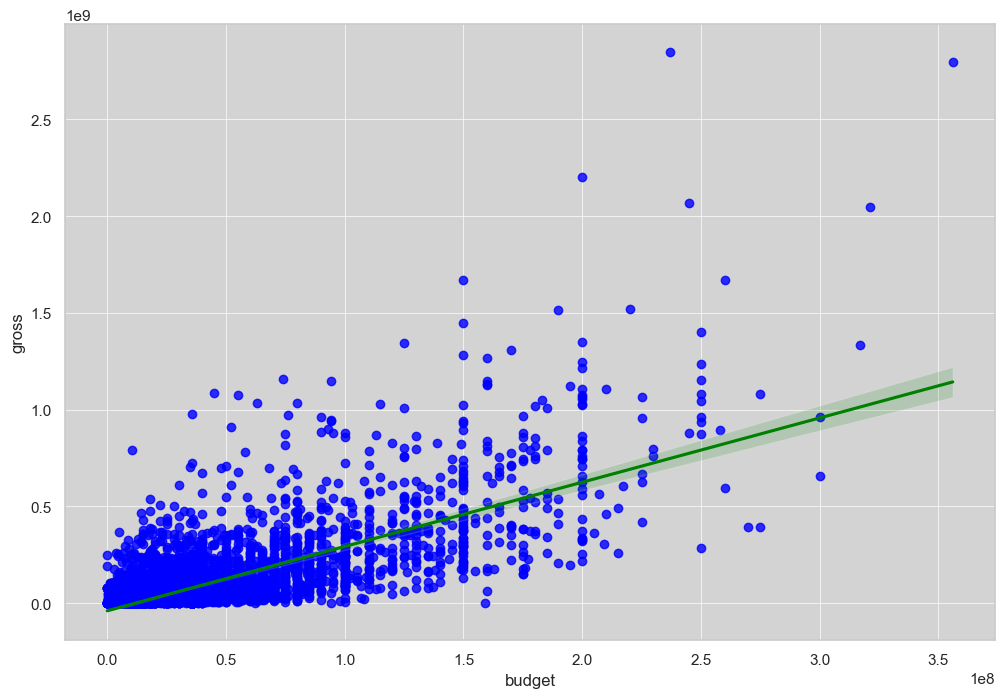

In [19]:
ax = sns.regplot(x = 'budget', y = 'gross', data = clean_data, scatter_kws={"color":"blue"}, line_kws={"color":"green"})
ax.set_facecolor("lightgrey")
ax.grid(color= "white", linestyle='-', linewidth = 0.5)

#### Pearson Correlation Coef

In [20]:
clean_data['budget'].corr(clean_data['gross'])

0.7126140888627901

In [21]:
#clean_data['budget'].corr(clean_data['gross'], method = 'spearman')
#clean_data['budget'].corr(clean_data['gross'], method = 'kendall')

### votes vs gross. Given the type of numerical data, we will use Pearson's correlation

#### Let's also visualize this with a scatter plot

<function matplotlib.pyplot.show(close=None, block=None)>

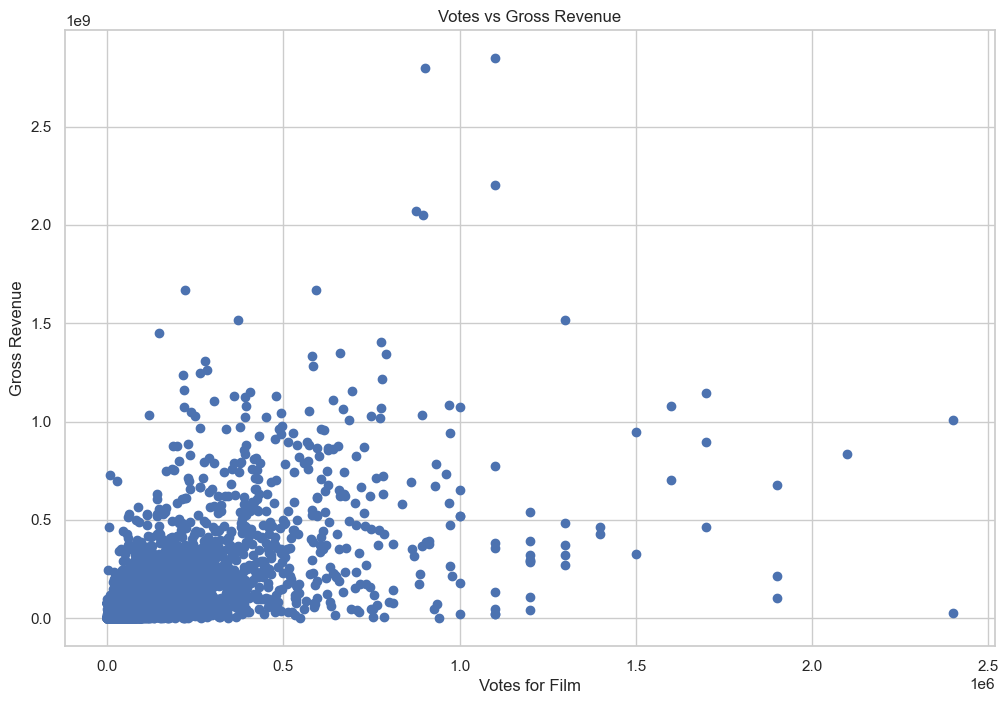

In [22]:
plt.scatter(x = clean_data['votes'], y = clean_data['gross'])
plt.title('Votes vs Gross Revenue')
plt.xlabel('Votes for Film')
plt.ylabel('Gross Revenue')
plt.show

#### Now let's visualize this using seaborn's regression plot

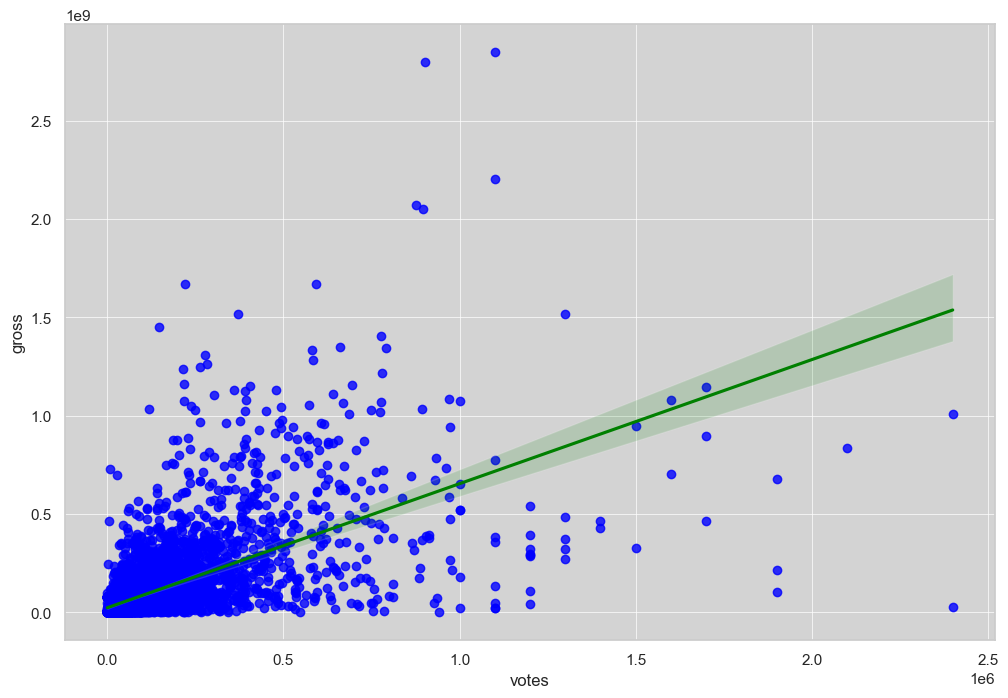

In [23]:
ax = sns.regplot(x = 'votes', y = 'gross', data = clean_data, scatter_kws={"color":"blue"}, line_kws={"color":"green"})
ax.set_facecolor("lightgrey")
ax.grid(color= "white", linestyle='-', linewidth = 0.5)

### Pearson Correlation Coef

In [24]:
clean_data['votes'].corr(clean_data['gross'])

0.6293216974777298

### Looking for signif. differences in gross revenue by company

In [25]:
# Extract data for each company
companies = clean_data['company'].unique()
company_data = [clean_data['gross'][clean_data['company'] == company] for company in companies]

# Perform ANOVA test
anova_result = f_oneway(*company_data)

# Print the ANOVA result
print("ANOVA Result:")
print(anova_result)

# Check if the result is statistically significant
if anova_result.pvalue < 0.05:
    print("There are significant differences in gross revenue among different companies.")

ANOVA Result:
F_onewayResult(statistic=1.2757214486436323, pvalue=1.0494883237763776e-12)
There are significant differences in gross revenue among different companies.


### Companies that tend to produce movies with higher average gross revenue

In [26]:
# Group by 'company' and calculate the average gross revenue for each company
average_gross_by_company = clean_data.groupby('company')['gross'].mean()

# Sort the result in descending order to see the companies with the highest average gross revenue first
sorted_average_gross = average_gross_by_company.sort_values(ascending=False)

# Display the result
sorted_average_gross.head(10)


company
Marvel Studios                1.255466e+09
Illumination Entertainment    1.097122e+09
Fairview Entertainment        9.665549e+08
B24                           8.806815e+08
Avi Arad Productions          8.560852e+08
Chris Morgan Productions      7.590569e+08
Jolie Pas                     7.584118e+08
Coco Cartoon                  7.262641e+08
Lucasfilm                     7.185352e+08
Marvel Entertainment          7.144215e+08
Name: gross, dtype: float64

### Looking for signif. differences in gros revenue by director

In [27]:
# Extract data for each director
directors = clean_data['director'].unique()
director_data = [clean_data['gross'][clean_data['director'] == director] for director in directors]

# Perform ANOVA test
anova_result = f_oneway(*director_data)

# Print the ANOVA result
print("ANOVA Result:")
print(anova_result)

# Check if the result is statistically significant
if anova_result.pvalue < 0.05:
    print("There are significant differences in gross revenue among different directors.")

ANOVA Result:
F_onewayResult(statistic=1.9108253995435331, pvalue=1.1004957423250525e-86)
There are significant differences in gross revenue among different directors.


### Directors that tend to produce movies with higher average gross revenue

In [31]:
# Group by 'director' and calculate the average gross revenue for each company
average_gross_by_director = clean_data.groupby('director')['gross'].mean()

# Sort the result in descending order to see the directors with the highest average gross revenue first
sorted_director_average_gross = average_gross_by_director.sort_values(ascending=False)

# Display the result
sorted_director_average_gross.head(10)

director
Anthony Russo       1.368850e+09
Kyle Balda          1.097122e+09
Josh Cooley         1.073395e+09
Chris Buck          1.059909e+09
Lee Unkrich         9.373943e+08
James Cameron       8.925841e+08
David Yates         8.602274e+08
George Lucas        8.497511e+08
J.J. Abrams         7.765626e+08
Robert Stromberg    7.584118e+08
Name: gross, dtype: float64

### Looking for signif. differences in gross revenue by genre (including only significant pairs in output)

In [29]:
# Extract data for each genre
genres = clean_data['genre'].unique()
genre_data = [clean_data['gross'][clean_data['genre'] == genre] for genre in genres]

# Perform ANOVA test
anova_result = f_oneway(*genre_data)

# Print the ANOVA result
print("ANOVA Result:")
print(anova_result)

# Check if the result is statistically significant
if anova_result.pvalue < 0.05:
    print("There are significant differences in gross revenue among different genres.")

    # Perform Tukey-Kramer post hoc test
    tukey_result = pairwise_tukeyhsd(clean_data['gross'], clean_data['genre'])
    
    # Filter and print only significant differences
    significant_pairs = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])
    significant_pairs = significant_pairs[significant_pairs['reject'] == True]
    
    print("\nTukey-Kramer Test Result - Significant Differences:")
    print(significant_pairs[['group1', 'group2', 'meandiff', 'lower', 'upper', 'reject']])
else:
    print("There are no significant differences in gross revenue among different genres.")


ANOVA Result:
F_onewayResult(statistic=56.13329789149255, pvalue=2.676410625994356e-180)
There are significant differences in gross revenue among different genres.


C:\Users\tjbru\anaconda3\Lib\site-packages\scipy\integrate\_quadpack_py.py:1233: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,



Tukey-Kramer Test Result - Significant Differences:
       group1     group2      meandiff         lower         upper  reject
0      Action  Adventure -3.563455e+07 -6.497290e+07 -6.296199e+06    True
1      Action  Animation  9.521100e+07  6.280407e+07  1.276179e+08    True
2      Action  Biography -9.568332e+07 -1.246724e+08 -6.669420e+07    True
3      Action     Comedy -9.942491e+07 -1.168686e+08 -8.198125e+07    True
4      Action      Crime -1.043470e+08 -1.310216e+08 -7.767245e+07    True
5      Action      Drama -1.045261e+08 -1.237980e+08 -8.525414e+07    True
7      Action    Fantasy -1.045186e+08 -1.881099e+08 -2.092735e+07    True
8      Action     Horror -9.549620e+07 -1.285772e+08 -6.241521e+07    True
17  Adventure  Animation  1.308456e+08  9.128305e+07  1.704081e+08    True
18  Adventure  Biography -6.004877e+07 -9.686387e+07 -2.323367e+07    True
19  Adventure     Comedy -6.379036e+07 -9.241314e+07 -3.516758e+07    True
20  Adventure      Crime -6.871249e+07 -1.03734

#### Genres that tend to produce movies with higher average gross revenue


In [32]:
# Group by 'genre' and calculate the average gross revenue for each company
average_gross_by_genre = clean_data.groupby('genre')['gross'].mean()

# Sort the result in descending order to see the directors with the highest average gross revenue first
sorted_genre_average_gross = average_gross_by_genre.sort_values(ascending=False)

# Display the result
sorted_genre_average_gross.head(10)

genre
Animation    2.398939e+08
Family       2.157876e+08
Action       1.446829e+08
Adventure    1.090484e+08
Mystery      1.011835e+08
Horror       4.918674e+07
Biography    4.899962e+07
Comedy       4.525803e+07
Crime        4.033589e+07
Fantasy      4.016434e+07
Name: gross, dtype: float64

# Findings

We have seen that votes and budget have the highest correlation with gross.

We have found significant differenes in gross by genre, and identified the genres that usually produce higher gross films.

We have found signifcant differences in gross by company and director, and identified the companies and directors that usually produce higher gross films.
